In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("US_Accidents_March23.csv")

C:\Users\user\AppData\Local\Temp\ipykernel_13768\1748654041.py:1: DtypeWarning: Columns (31,32,33,34,35,36,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("US_Accidents_March23.csv")


In [3]:
print(df.head())
print(df.info())

    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          F

In [4]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df = df.dropna(subset=['Start_Time'])
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.day_name()

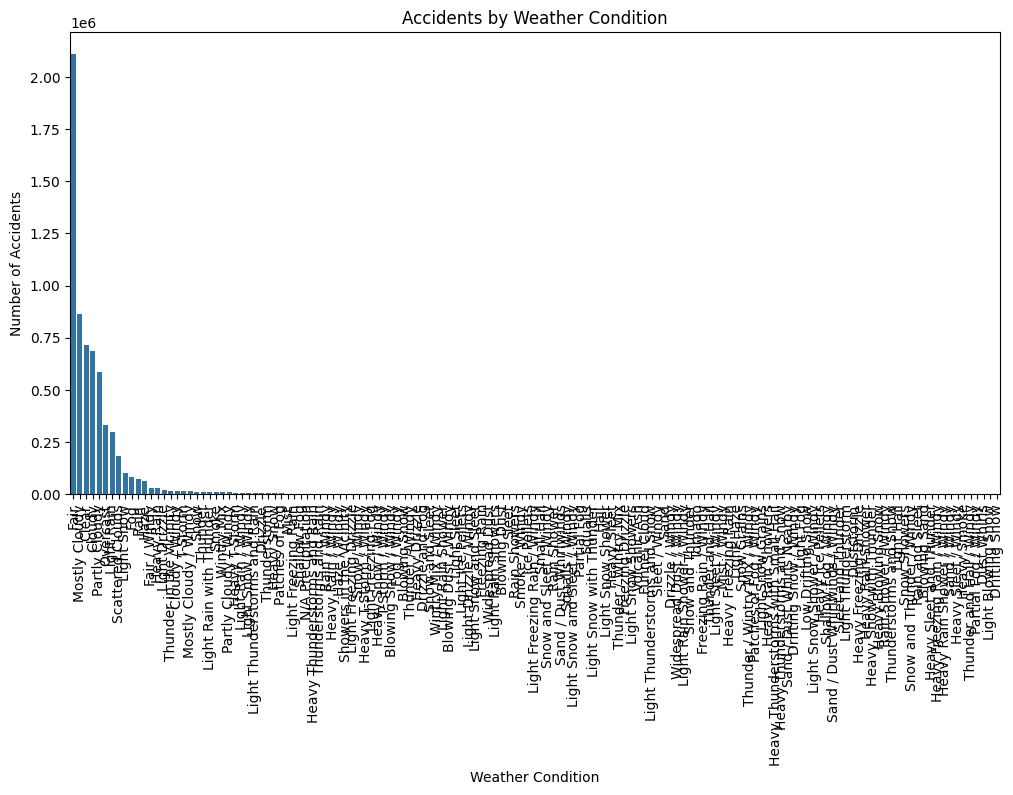

In [5]:
weather_accidents = df['Weather_Condition'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=weather_accidents.index, y=weather_accidents.values)
plt.xticks(rotation=90)
plt.title('Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.show()


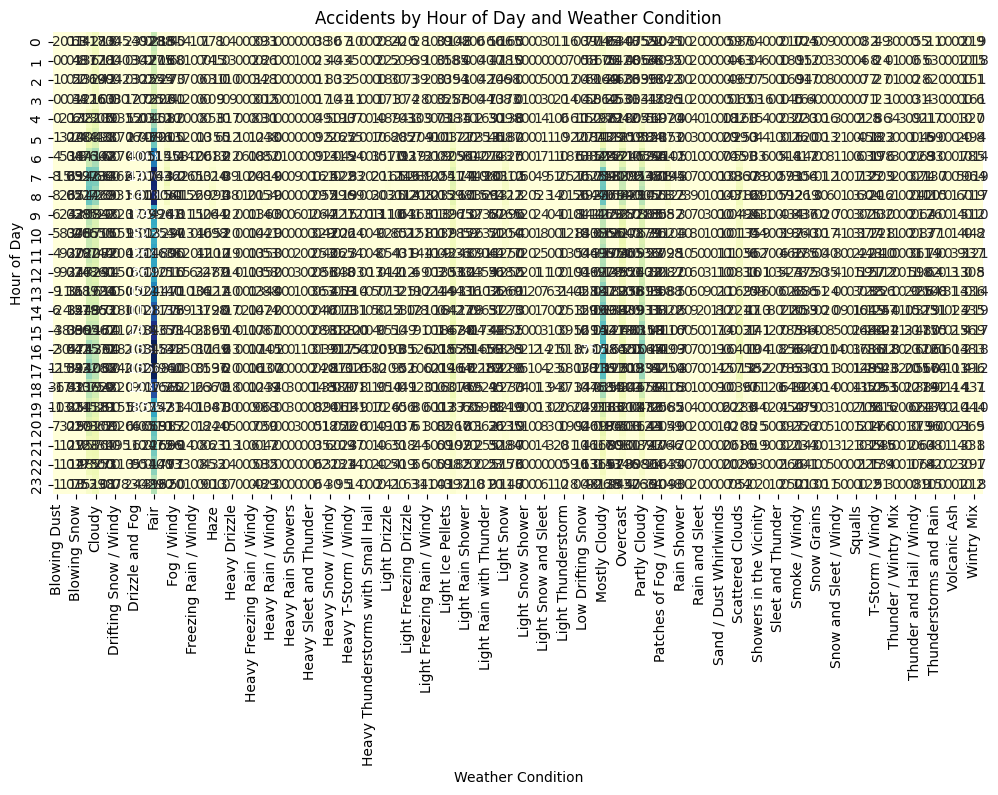

In [7]:
hour_weather_accidents = df.groupby(['Hour', 'Weather_Condition']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(hour_weather_accidents, cmap="YlGnBu", annot=True, fmt="d", cbar=False)
plt.title('Accidents by Hour of Day and Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Hour of Day')
plt.show()


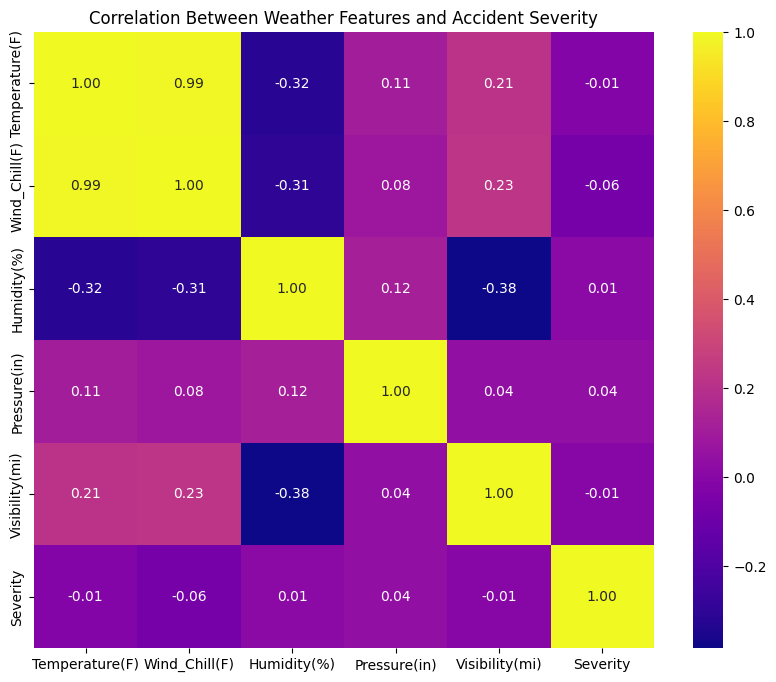

In [8]:
weather_features = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)']
correlation = df[weather_features + ['Severity']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='plasma', fmt='.2f')
plt.title('Correlation Between Weather Features and Accident Severity')
plt.show()


In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Weather_Condition_encoded'] = label_encoder.fit_transform(df['Weather_Condition'])


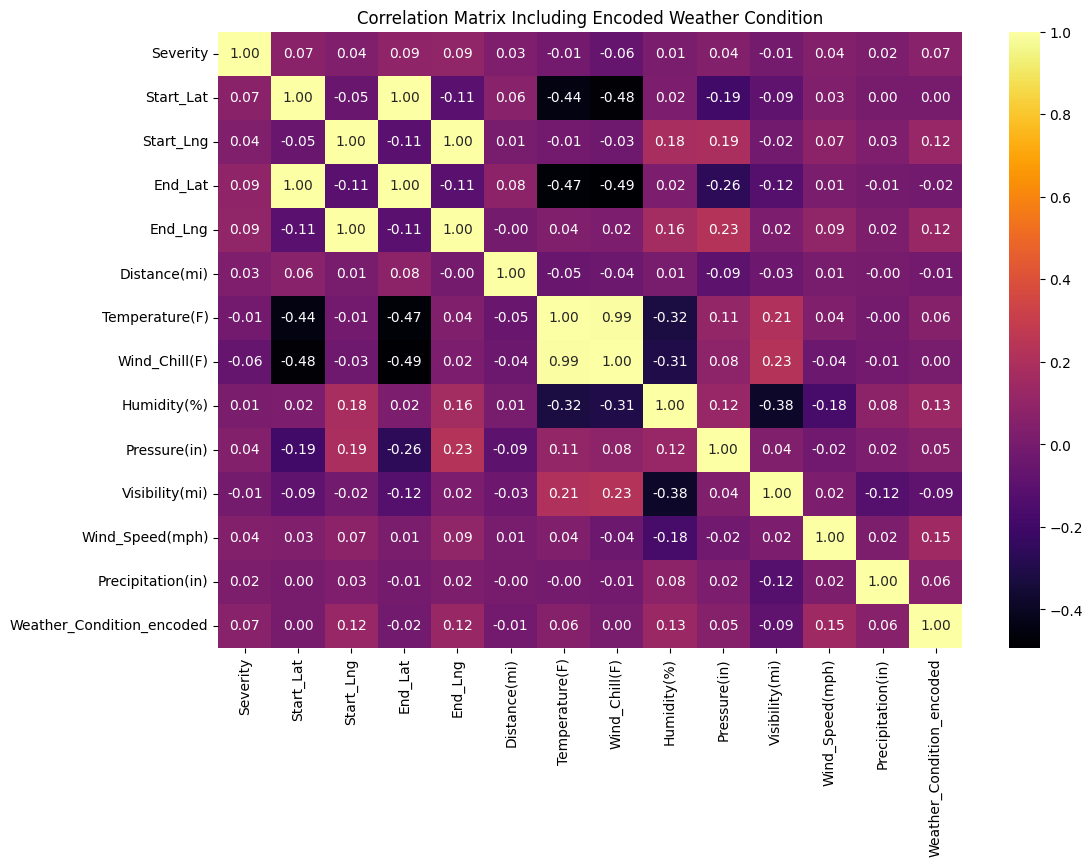

In [10]:
numeric_df = df.select_dtypes(include=['float64', 'int64']).copy()
numeric_df['Weather_Condition_encoded'] = df['Weather_Condition_encoded']
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', fmt='.2f', cbar=True)
plt.title('Correlation Matrix Including Encoded Weather Condition')
plt.show()
